In [1]:
import jax
jax.config.update('jax_disable_jit', False) # Turn off JIT because of an issue in shortwave_radiation.py:169
jax.config.update("jax_debug_infs", True) # doesn't add any time since the saved time is otherwise spent getting the nodal quantities
jax.config.update("jax_debug_nans", False) # some physics fields might be nan

In [2]:
from jcm.model import Model, get_coords
from jcm.boundaries import initialize_boundaries

realistic_boundaries = lambda coords=get_coords(): initialize_boundaries(
    '../jcm/data/bc/t30/clim/boundaries_daily.nc',
    coords.horizontal,
)

In [3]:
boundaries = realistic_boundaries()
model = Model(orography=boundaries.orog)

final_state, predictions = model.unroll(
    state=model.prepare_initial_state(),
    boundaries=boundaries,
    save_interval=5.,
    total_time=60.,
)

In [4]:
pred_ds = predictions.to_xarray()

In [5]:
print(f"dataset size: {pred_ds.nbytes/1e6:.1f}MB")
pred_ds

dataset size: 44.0MB


<xarray.Dataset> Size: 44MB
Dimensions:                          (time: 12, lon: 96, lat: 48, level: 8)
Coordinates:
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
  * level                            (level) float32 32B 0.95 0.835 ... 0.025
  * time                             (time) datetime64[ns] 96B 2000-01-01 ......
Data variables: (12/79)
    date.tyear                       (time) float32 48B 0.9986 ... 0.1492
    surface_flux.t0                  (time, lon, lat) float32 221kB 288.0 ......
    convection.cbmf                  (time, lon, lat) float32 221kB 0.0 ... 0.0
    longwave_rad.dfabs               (time, level, lon, lat) float32 2MB -5.9...
    mod_radcon.tau2.2                (time, level, lon, lat) float32 2MB 1.0 ...
    surface_flux.rlds                (time, lon, lat) float32 221kB 87.85 ......
    ...                               ...
    condensation.dtlsc               (time, level, lon, lat) float32 2MB 0.0 ...
    v_wind                           (time, level, lon, lat) float32 2MB 0.0 ...
    surface_flux.v0                  (time, lon, lat) float32 221kB 0.0 ... 5...
    specific_humidity                (time, level, lon, lat) float32 2MB 0.0 ...
    shortwave_rad.ozone              (time, lon, lat) float32 221kB 10.56 ......
    shortwave_rad.stratz             (time, lon, lat) float32 221kB 0.0 ... 6.0
Attributes:
    longitude_wavenumbers:     32
    total_wavenumbers:         33
    longitude_nodes:           96
    latitude_nodes:            48
    latitude_spacing:          gauss
    longitude_offset:          0.0
    radius:                    6371220.0
    spherical_harmonics_impl:  RealSphericalHarmonics
    spmd_mesh:                 
    boundaries:                [0.0, 0.05000000074505806, 0.14000000059604645...
    horizontal_grid_type:      Grid
    vertical_grid_type:        SigmaCoordinates

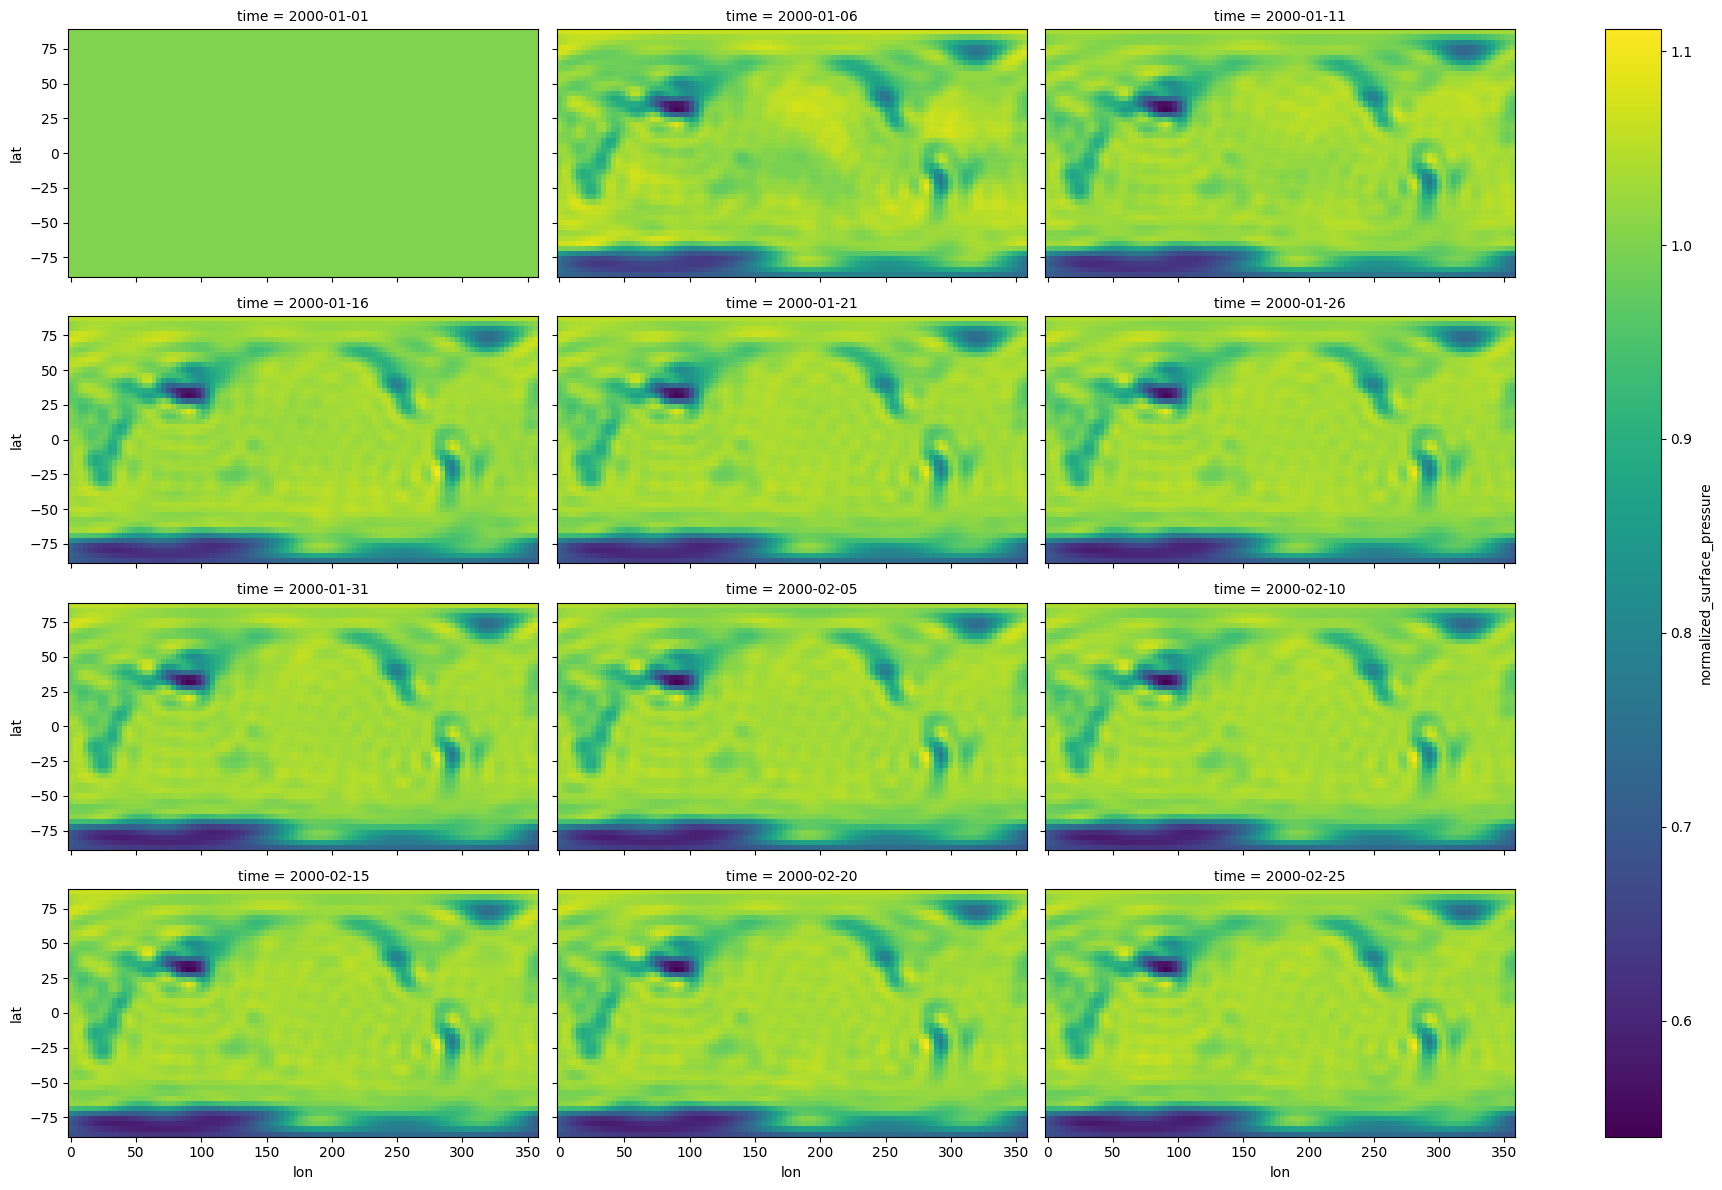

In [6]:
pred_ds['normalized_surface_pressure'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

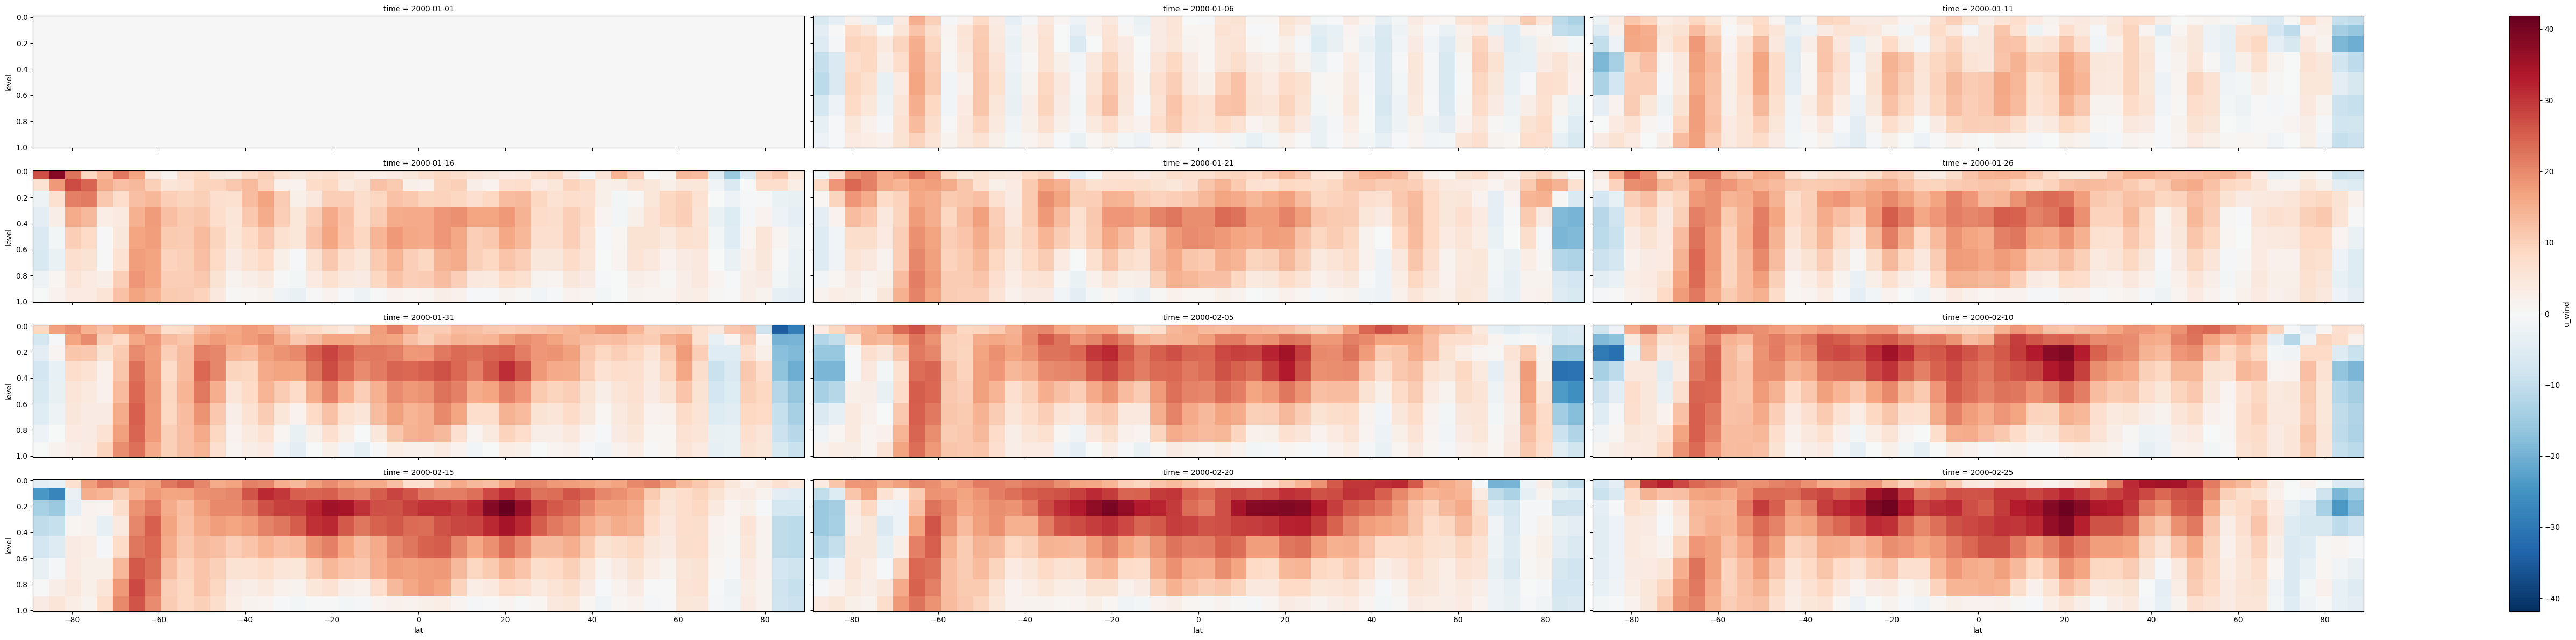

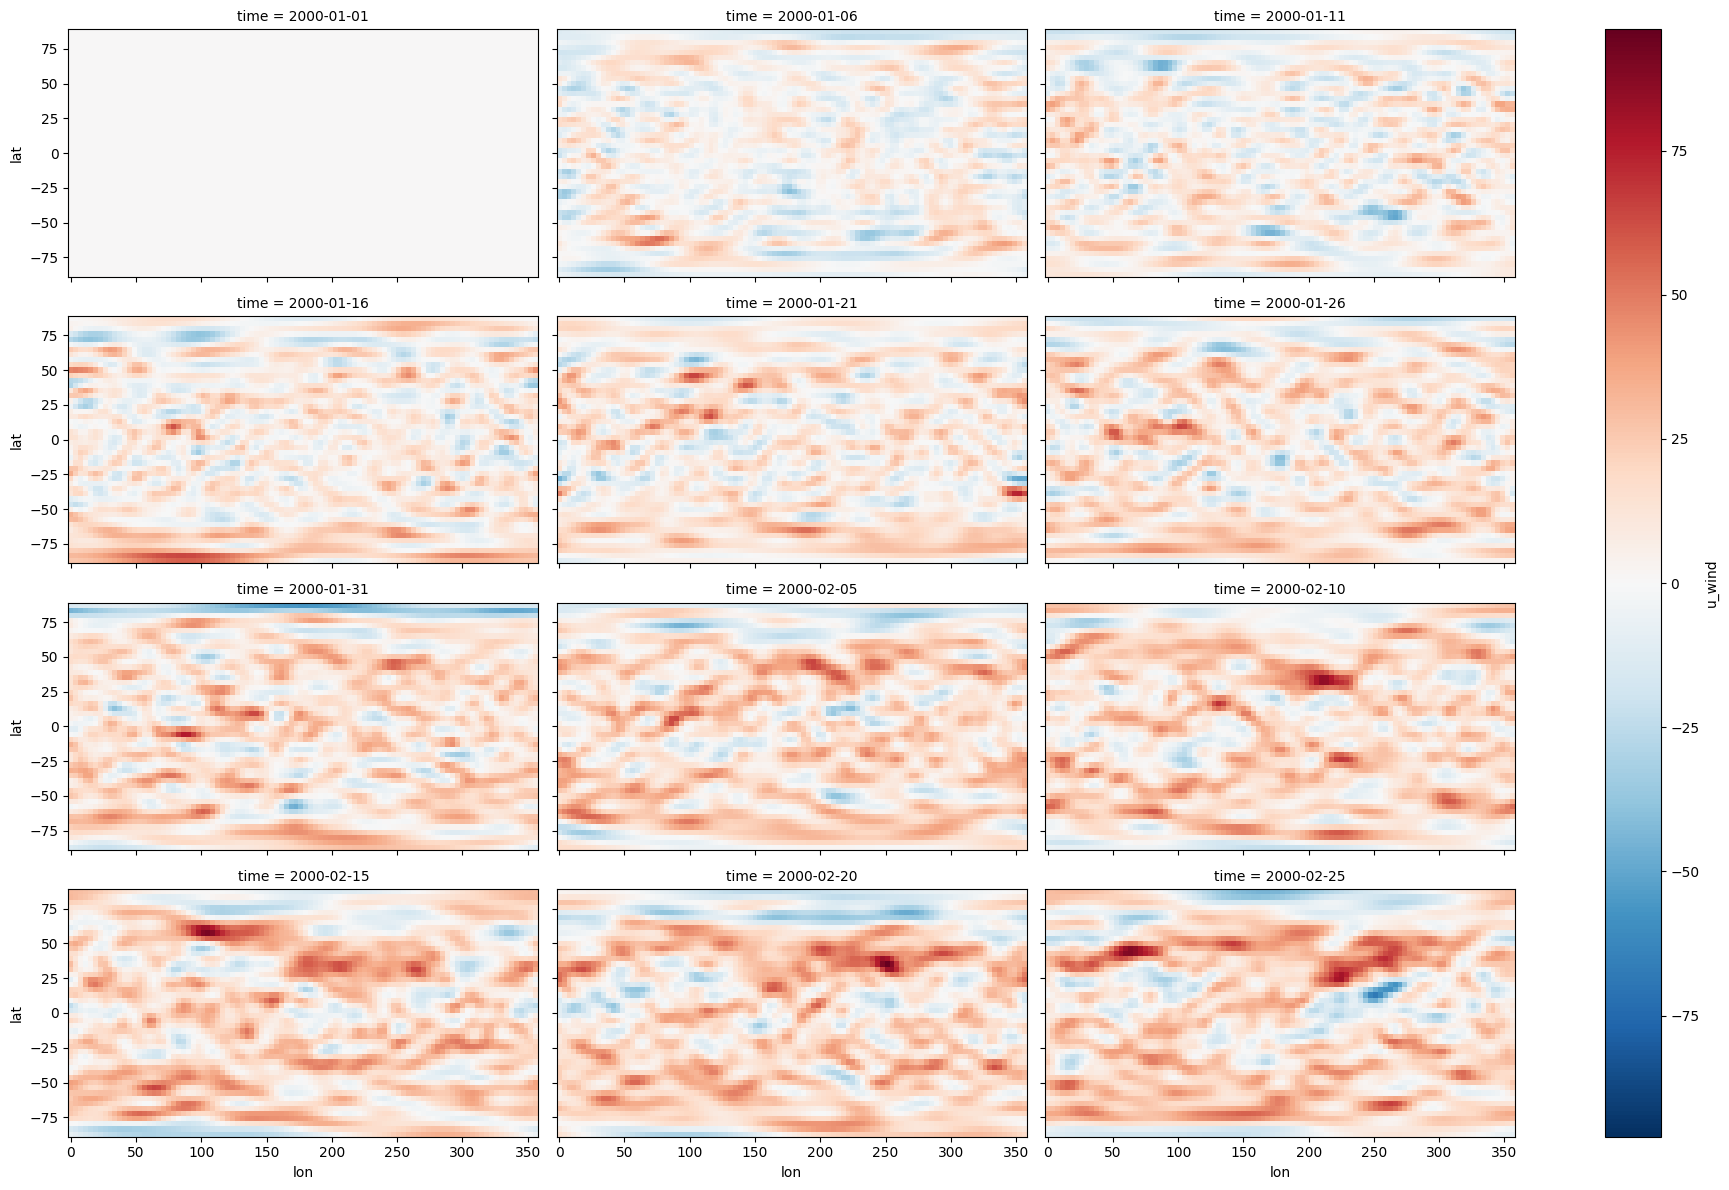

In [7]:
pred_ds['u_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['u_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

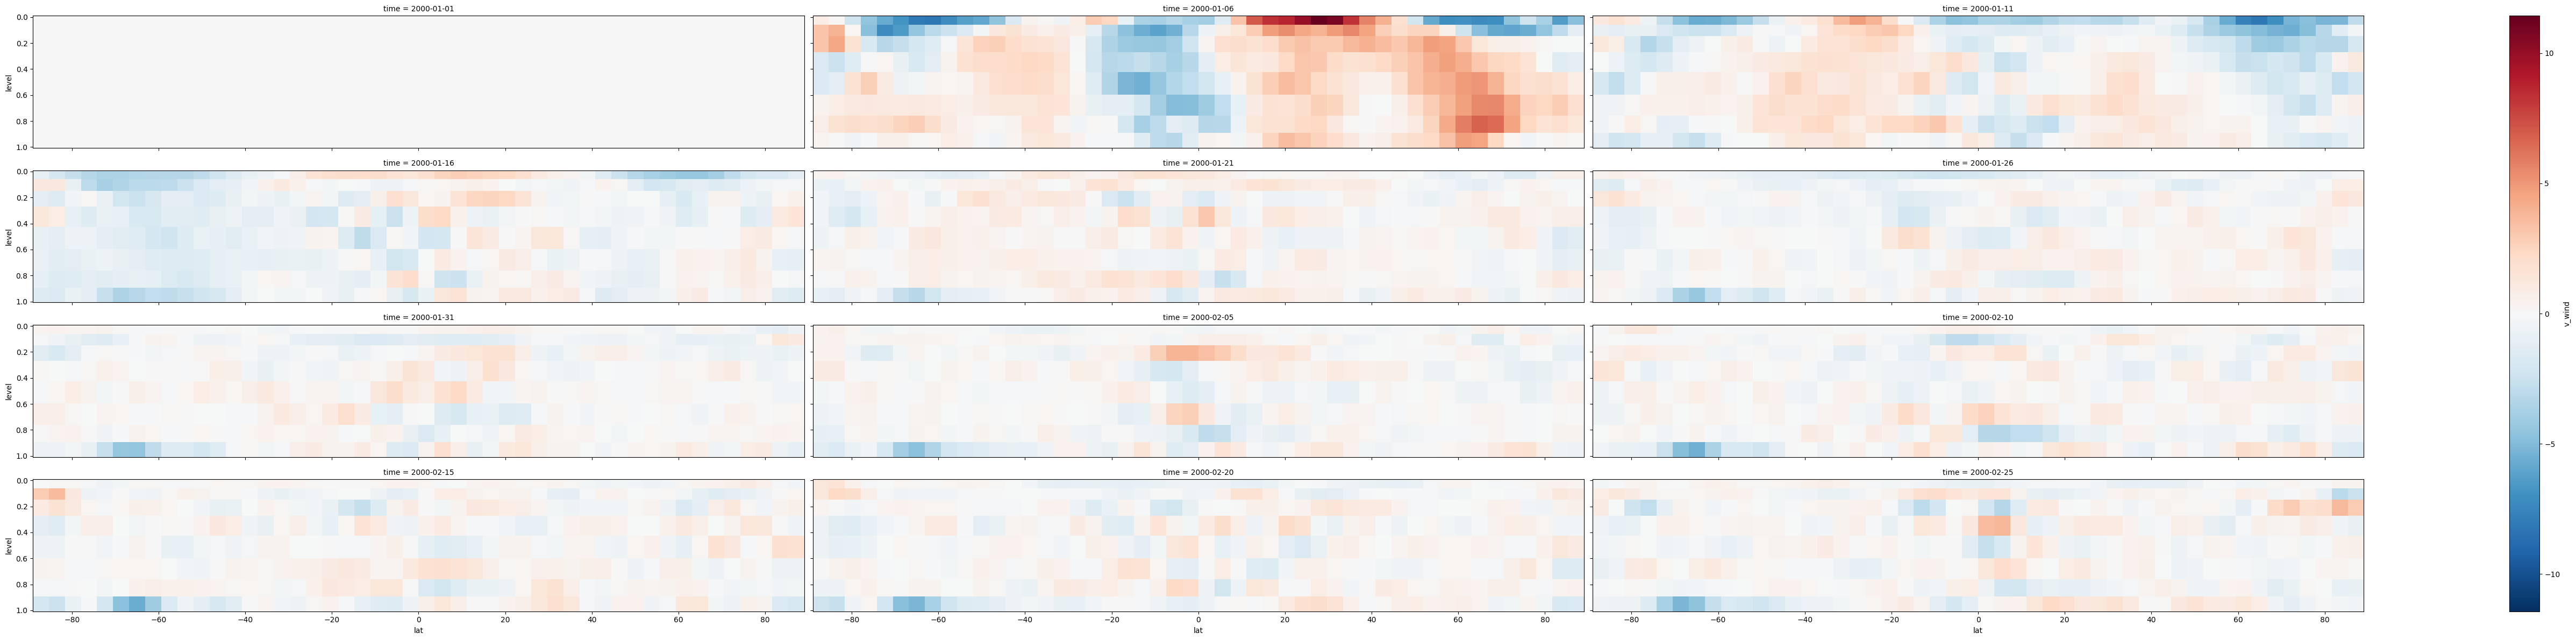

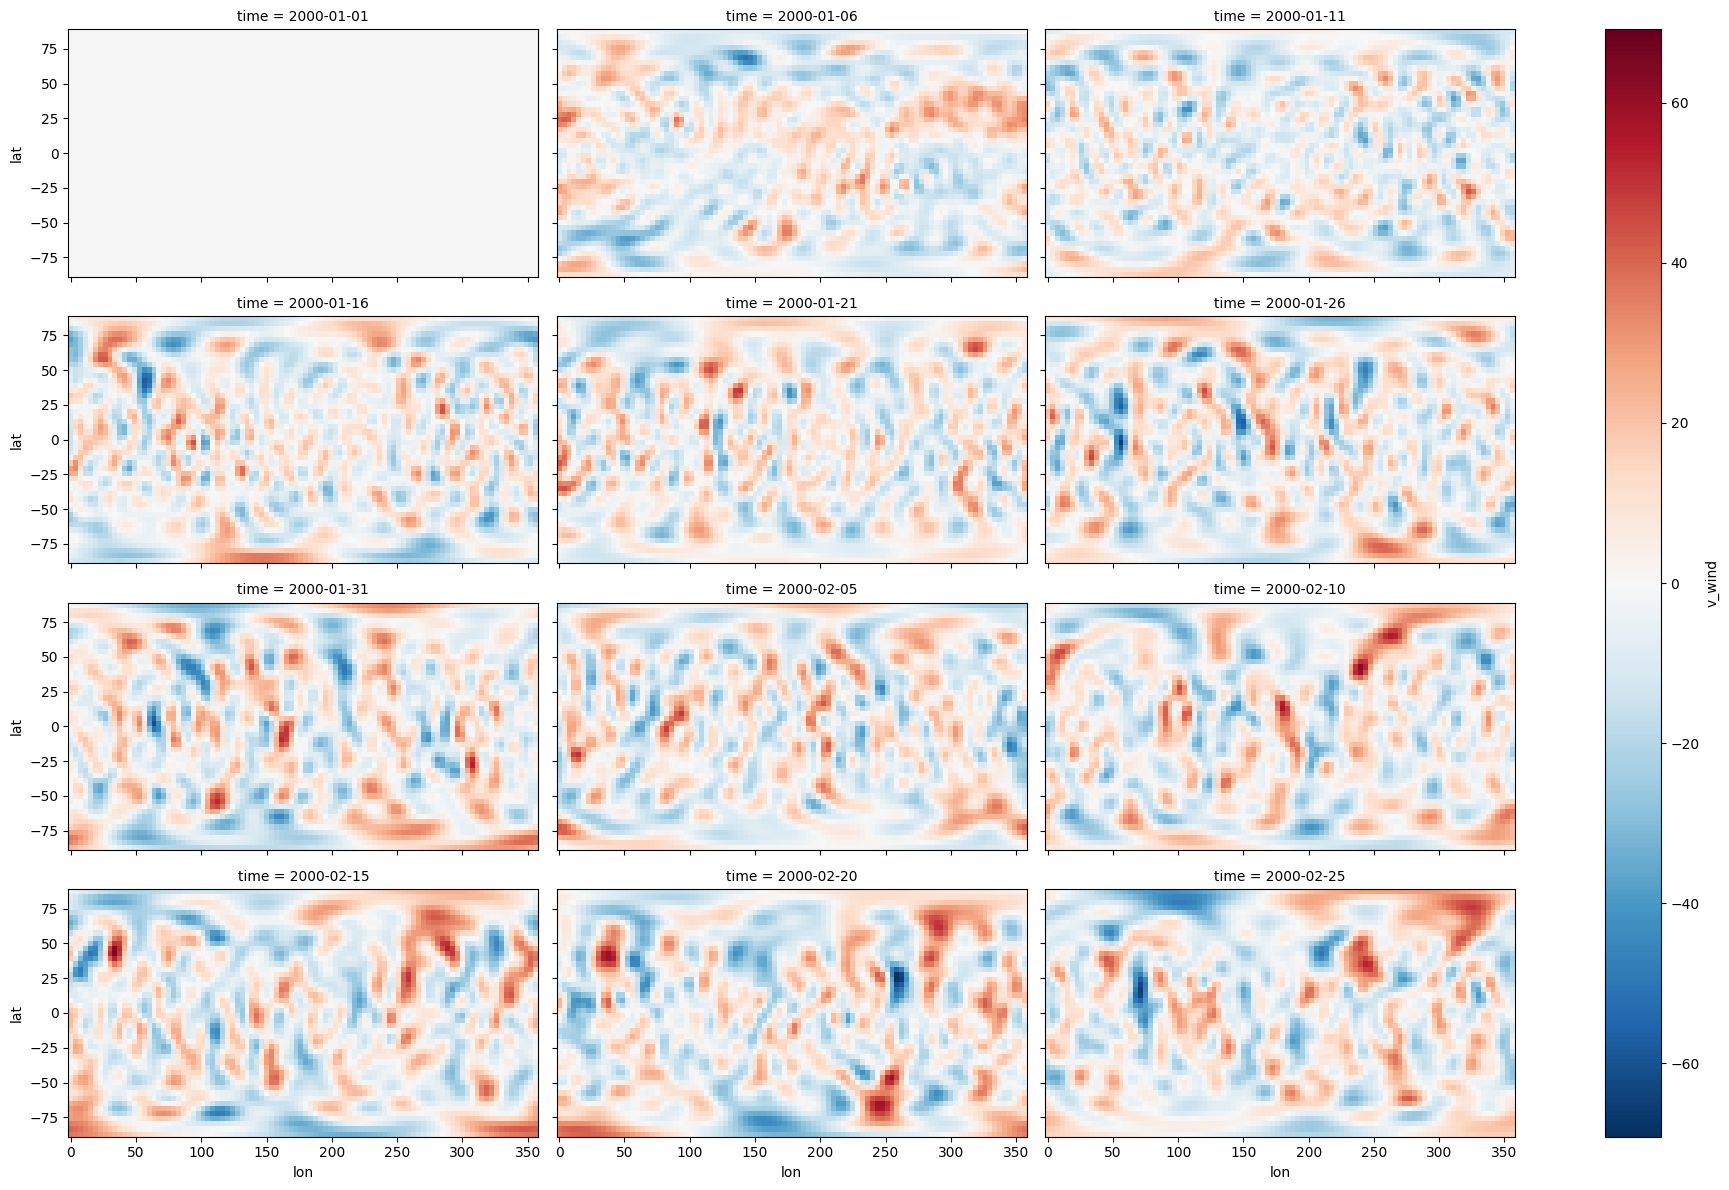

In [8]:
pred_ds['v_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['v_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

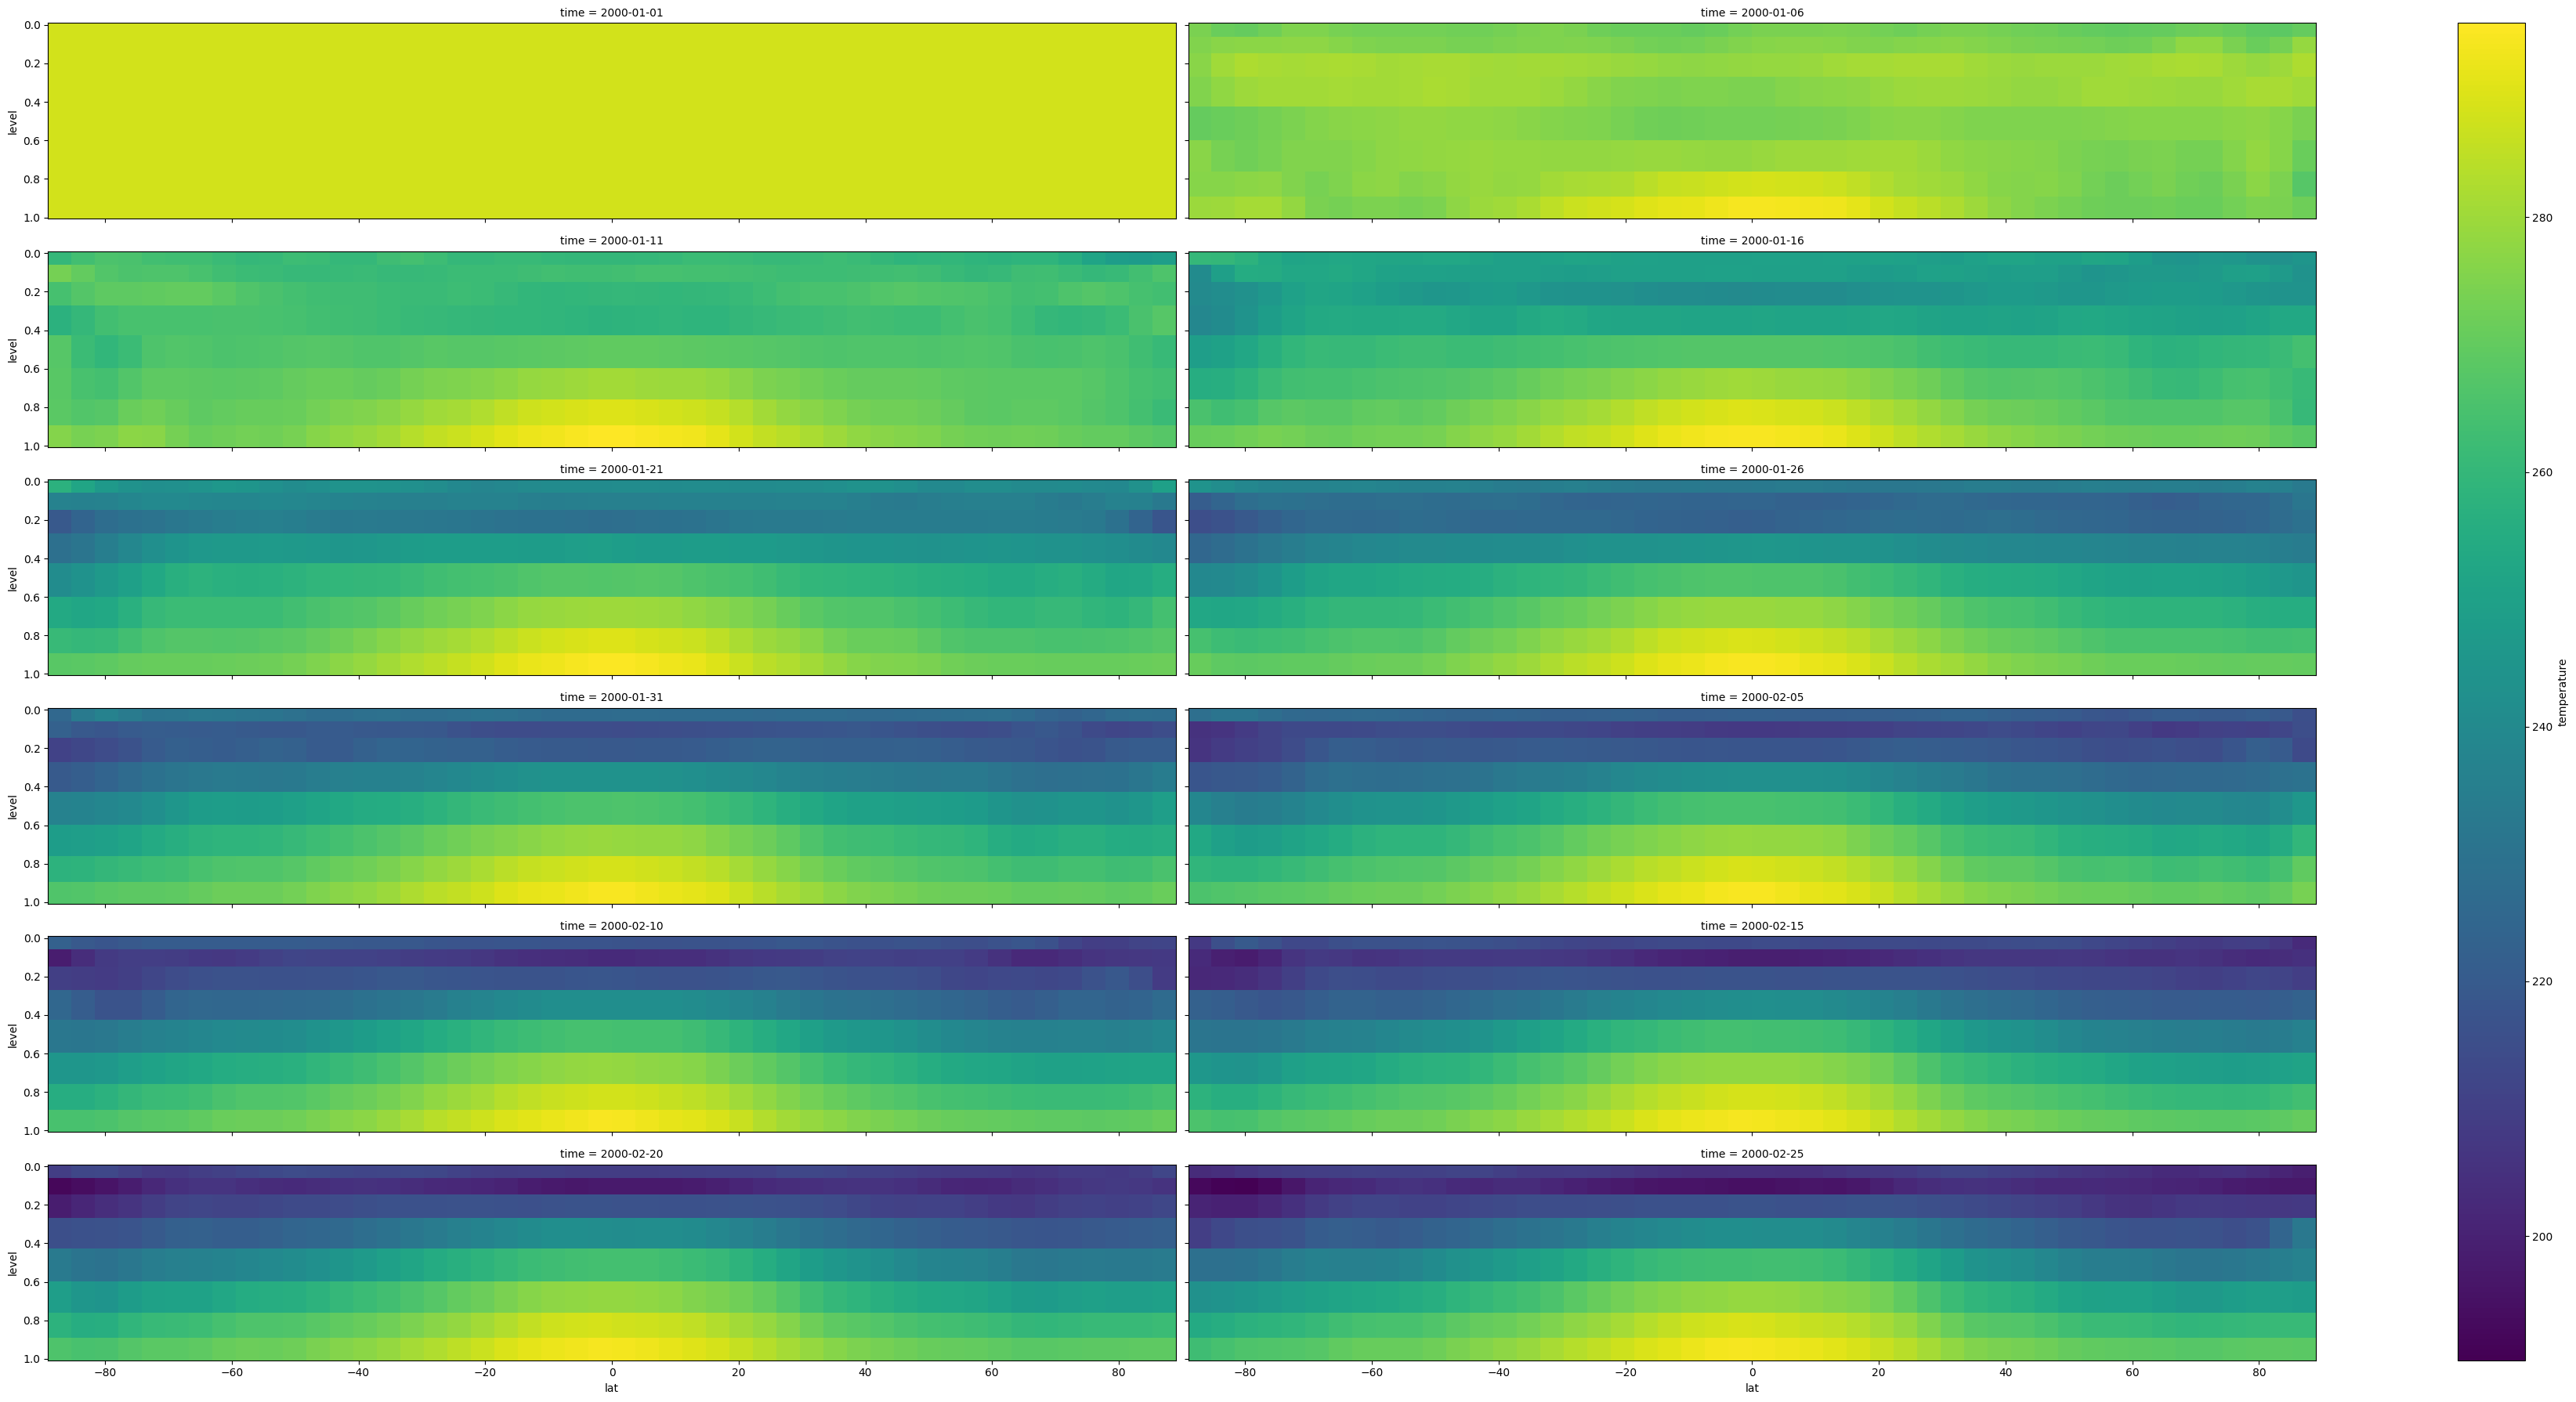

In [9]:
pred_ds['temperature'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=2, aspect=6, yincrease=False)

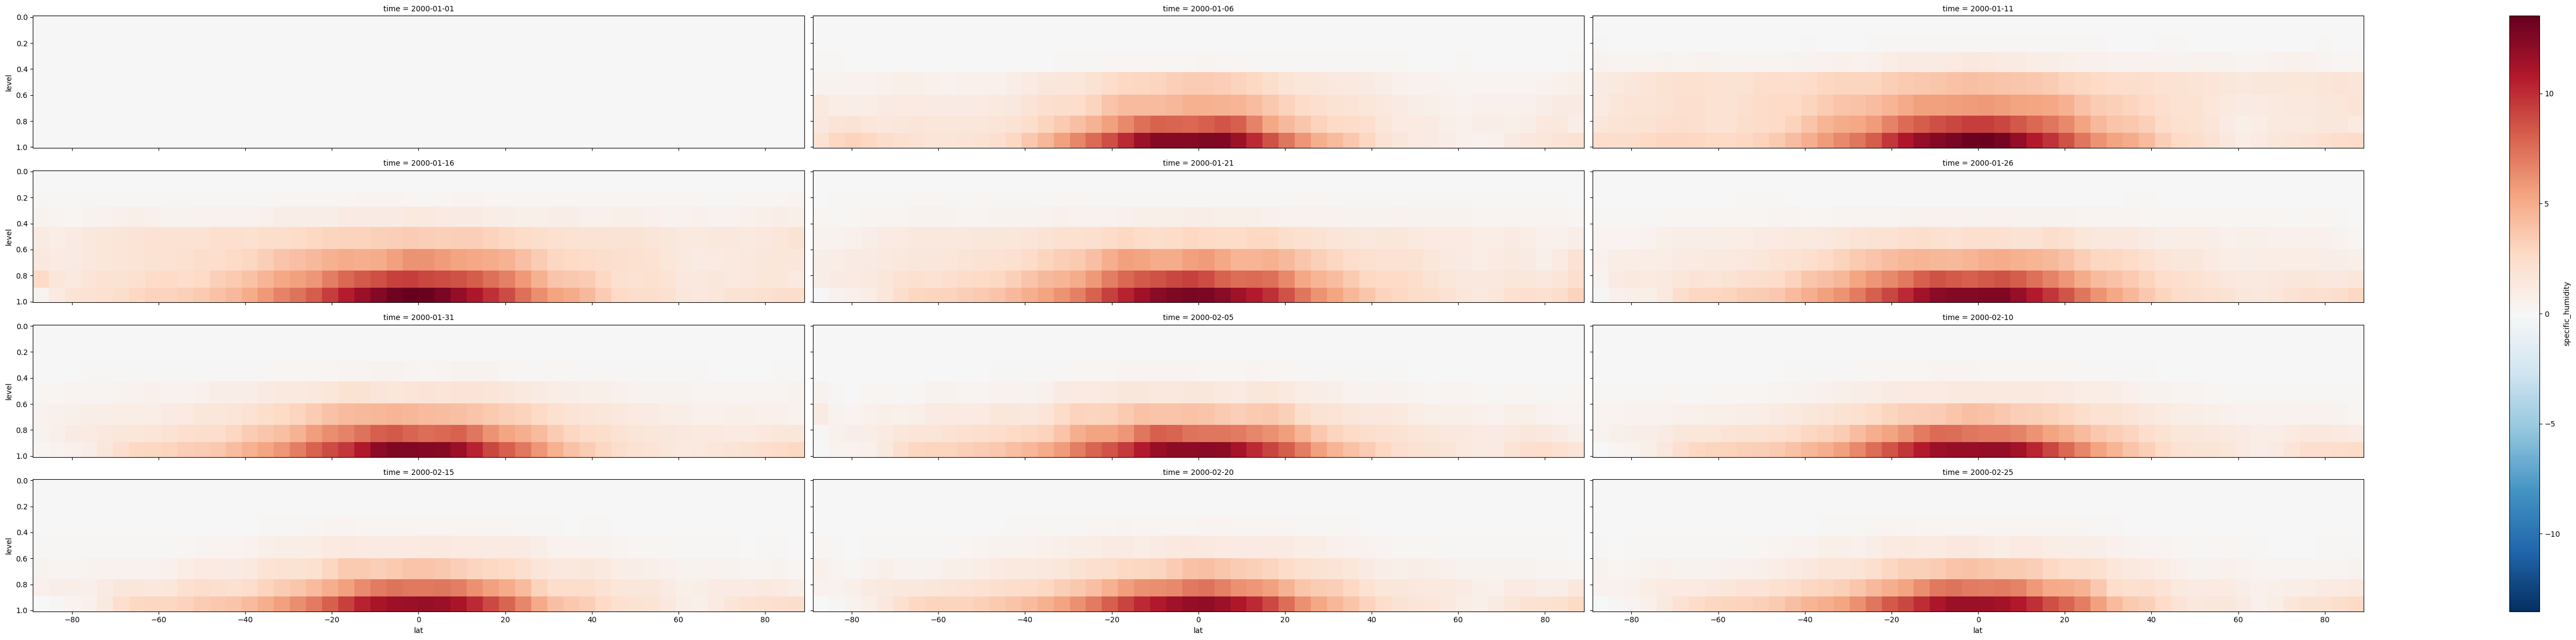

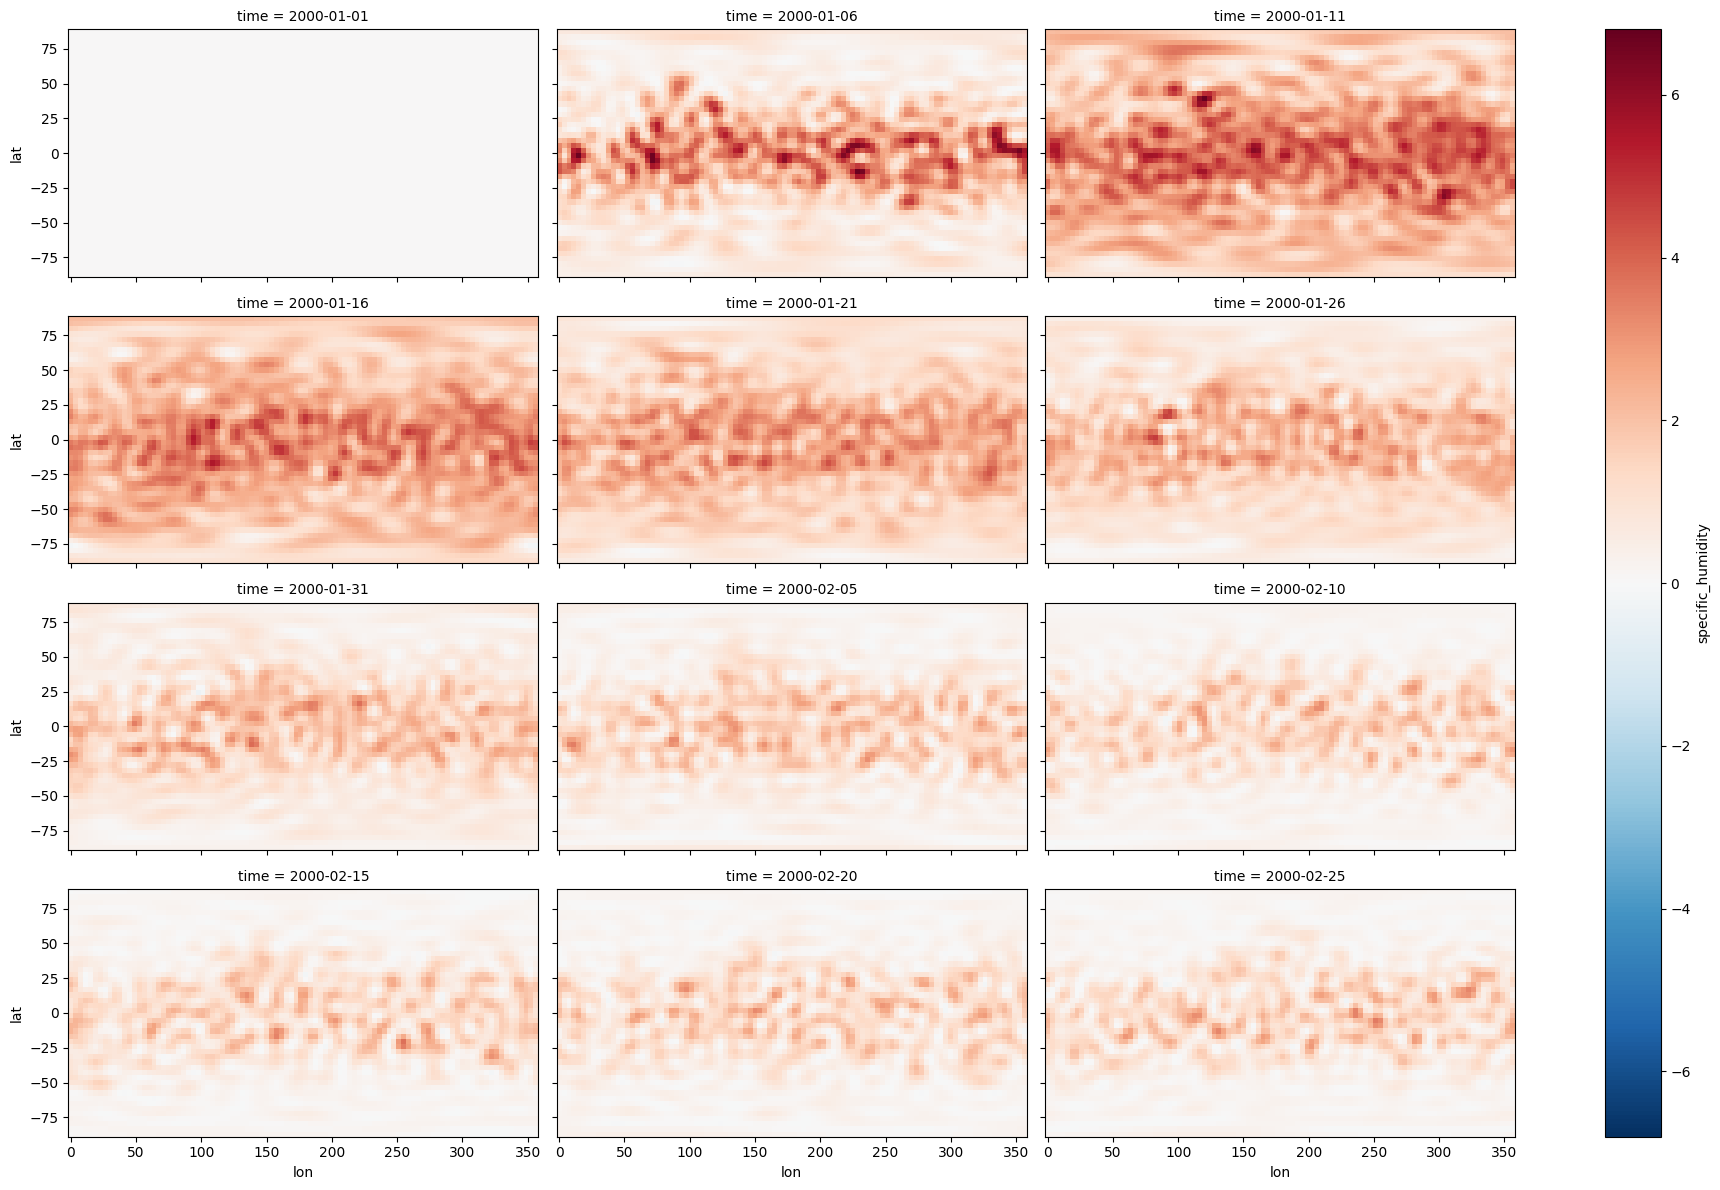

In [10]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

### clouds!

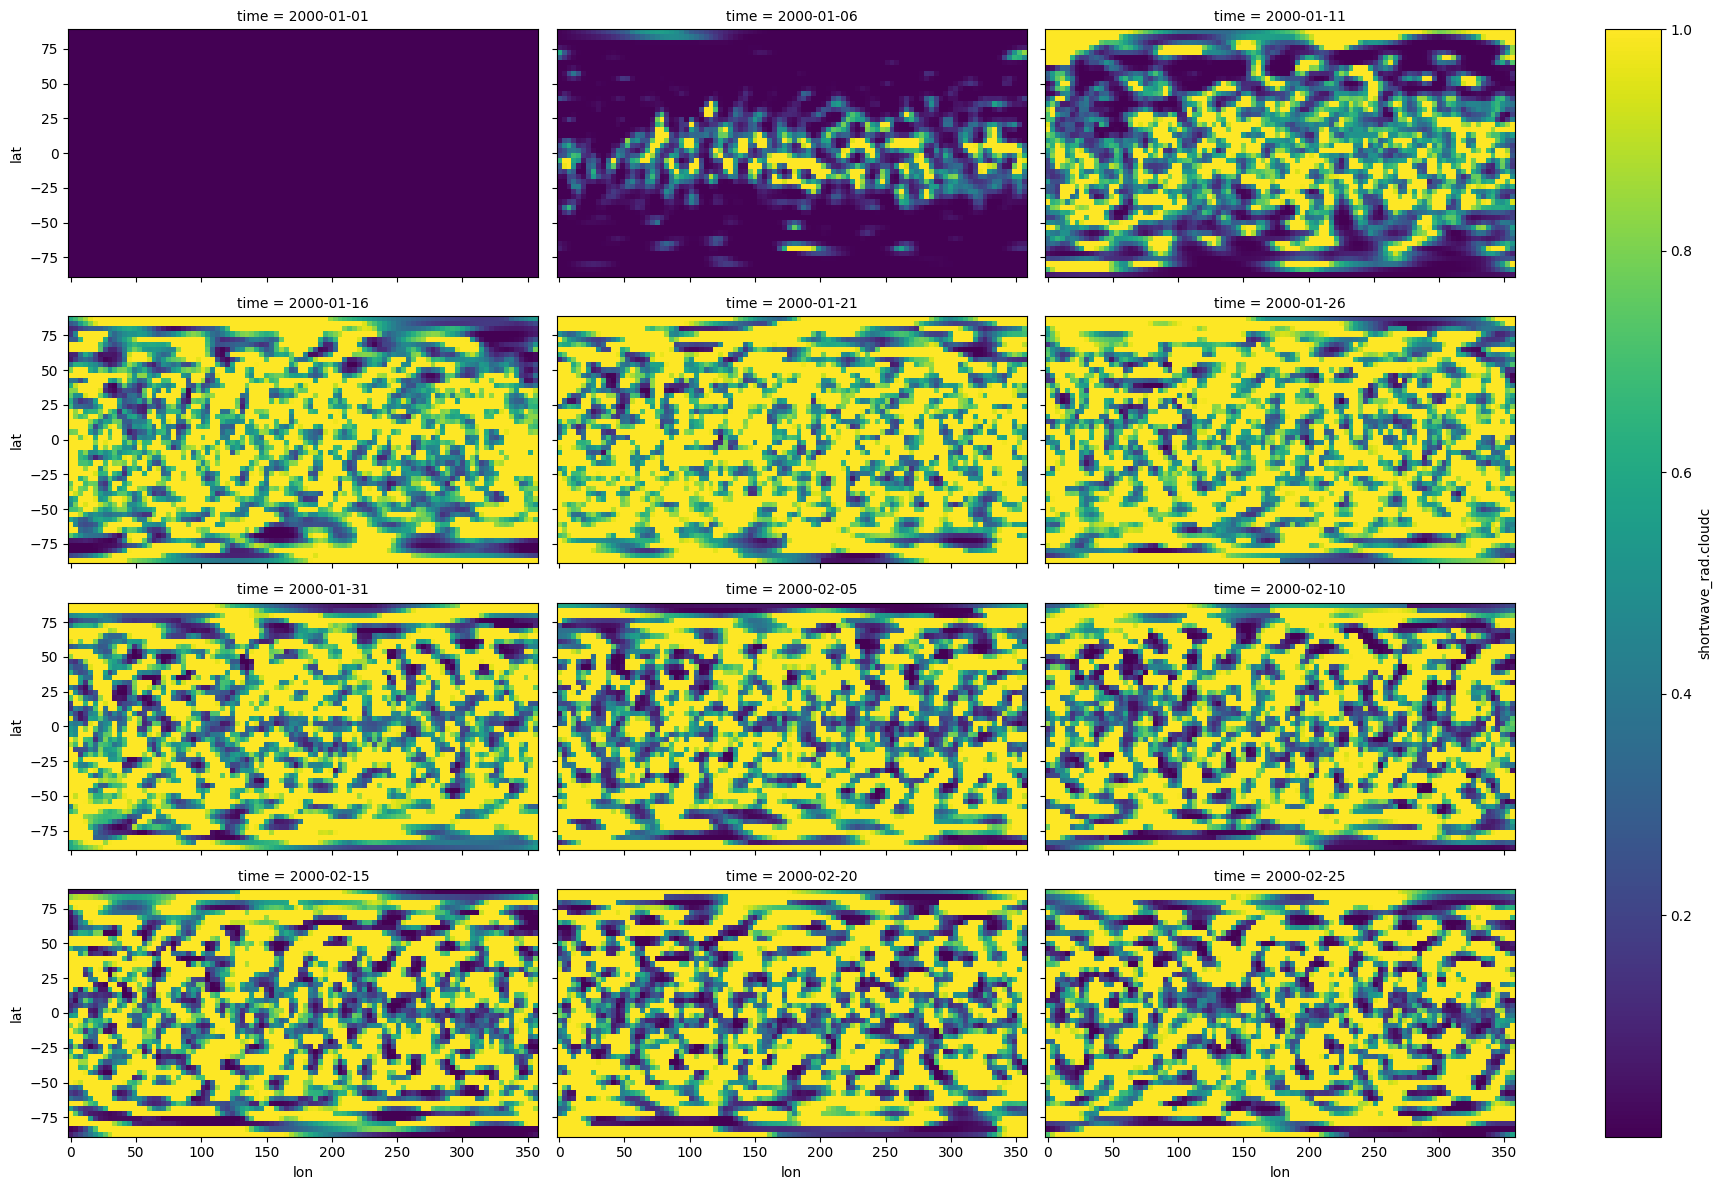

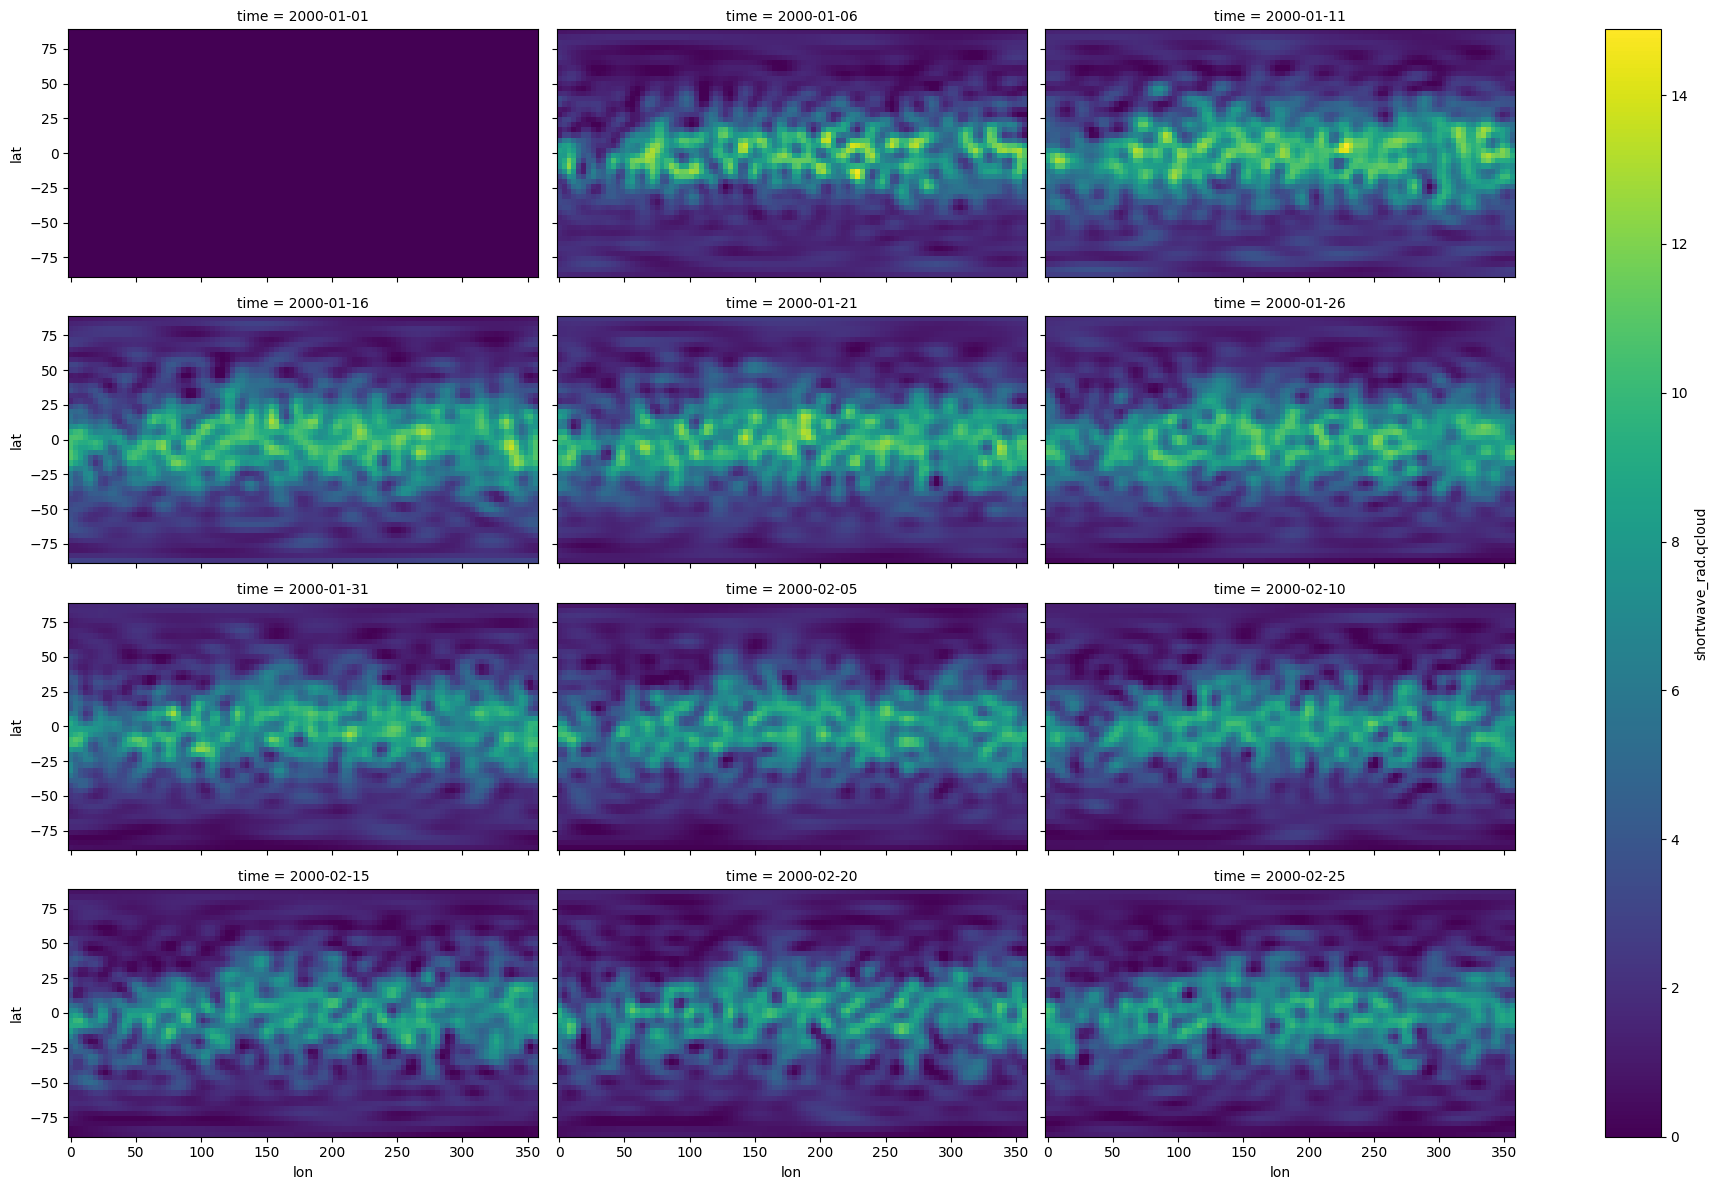

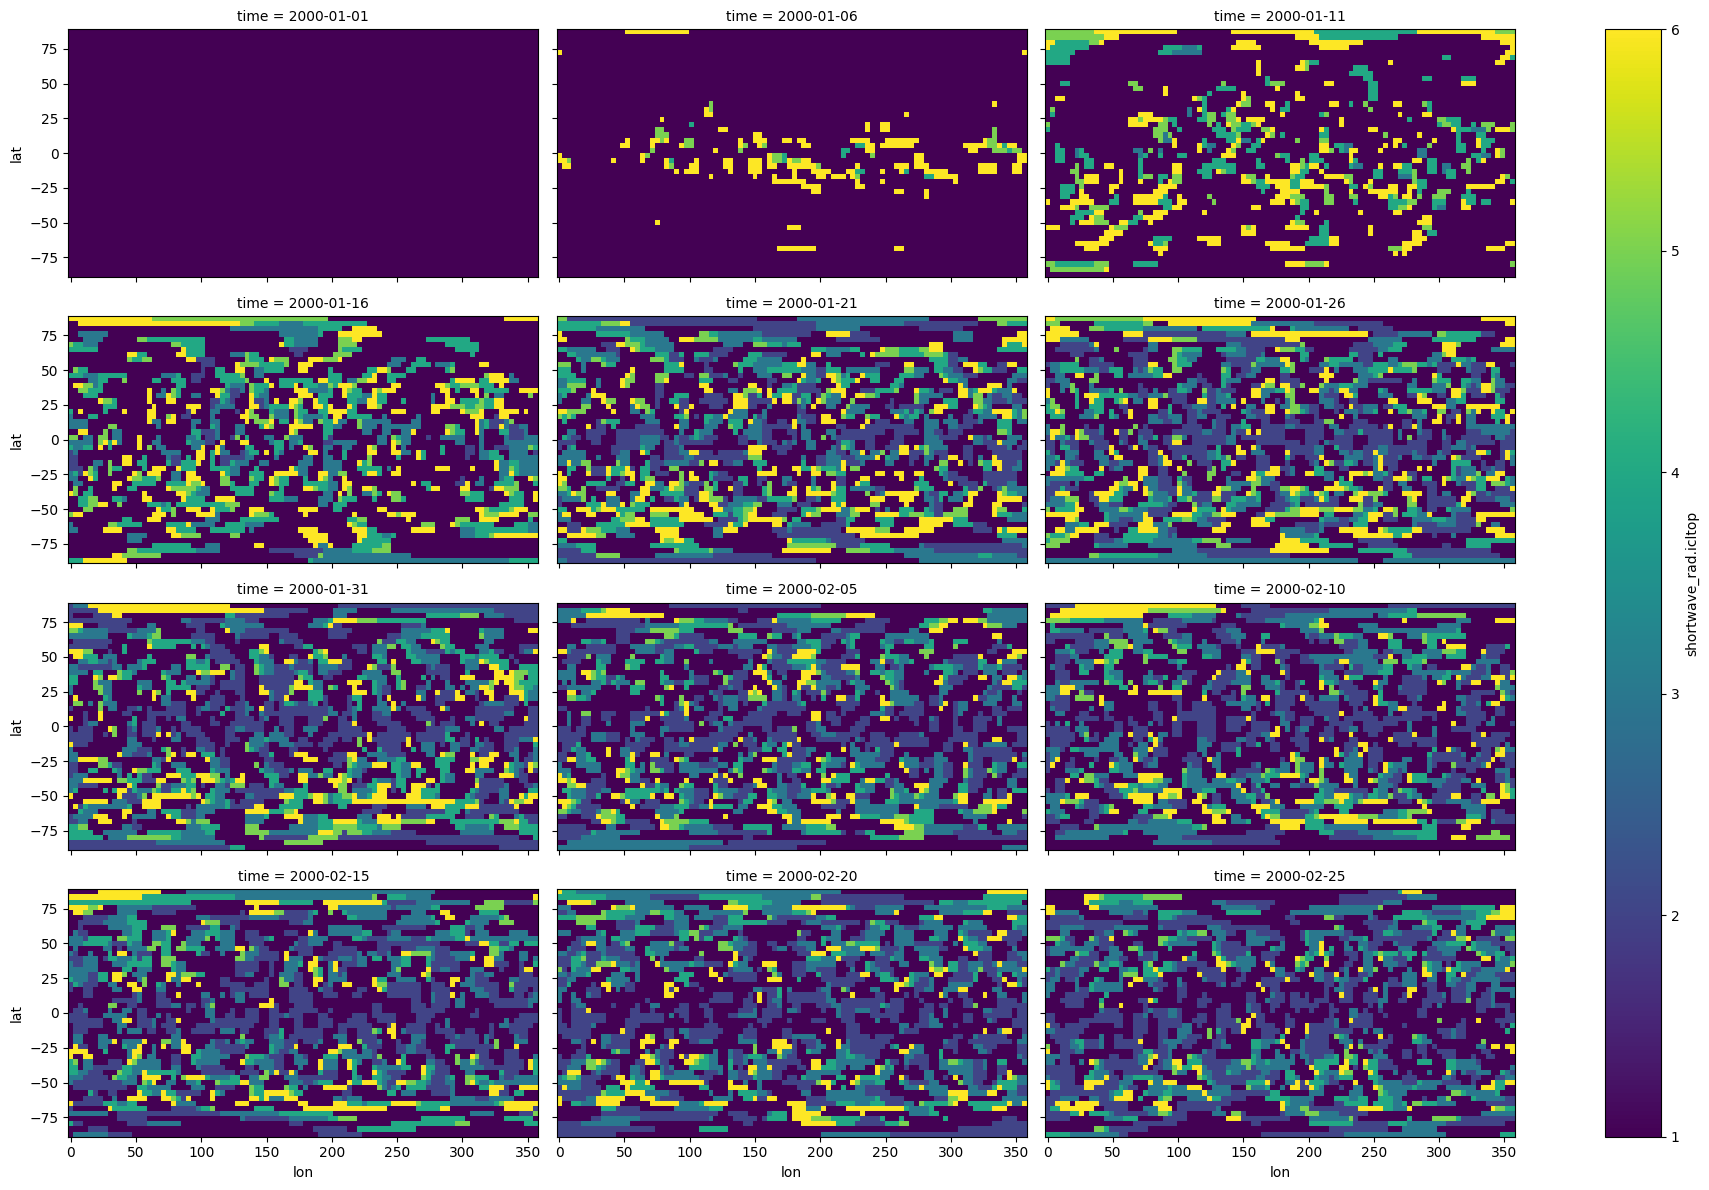

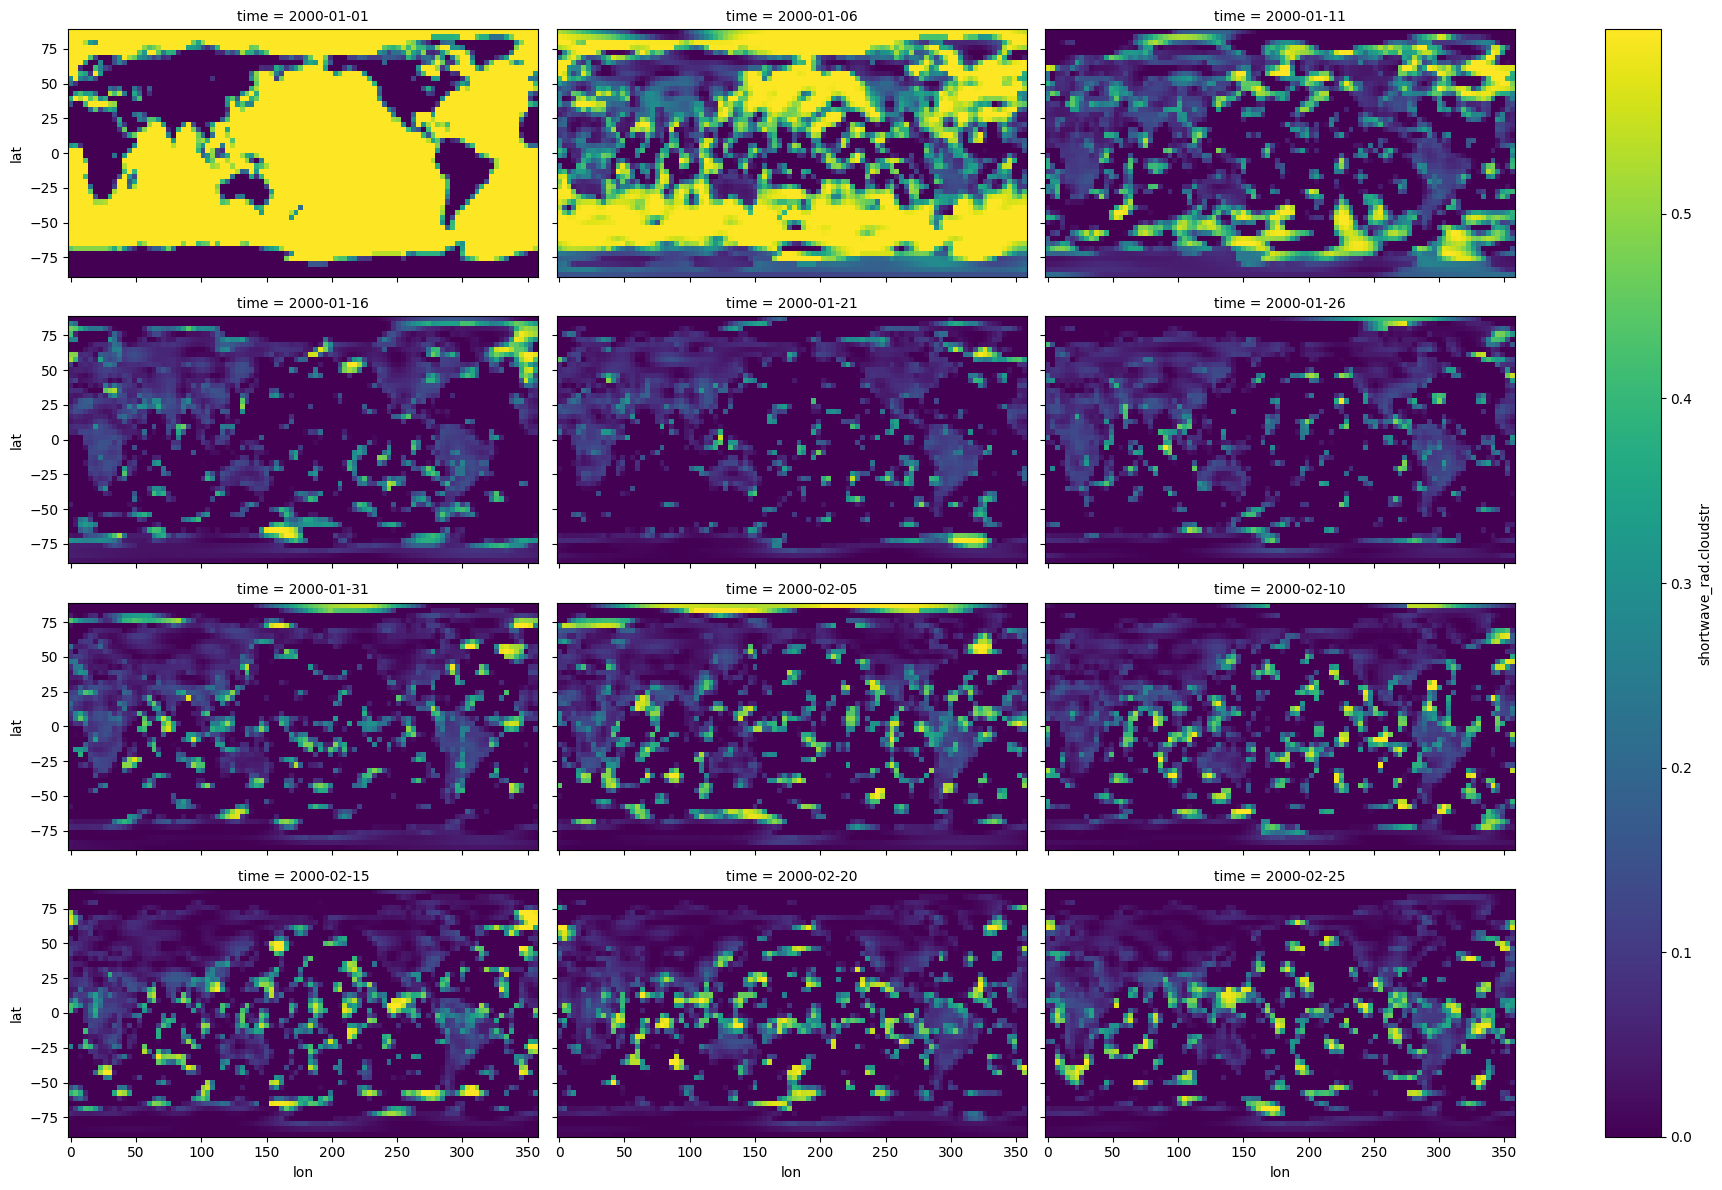

In [11]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.icltop'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.cloudstr'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)